# EDA Germany 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime

In [2]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")

In [86]:
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370589 entries, 0 to 1370588
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1370589 non-null  object        
 1   train                  1210176 non-null  object        
 2   path                   1241603 non-null  object        
 3   eva_nr                 1370589 non-null  int64         
 4   category               1370589 non-null  int64         
 5   name                   1370589 non-null  object        
 6   state                  1370589 non-null  object        
 7   city                   1370589 non-null  object        
 8   zip                    1370589 non-null  int64         
 9   long                   1370589 non-null  float64       
 10  lat                    1370589 non-null  float64       
 11  arrival_plan           1241603 non-null  datetime64[ns]
 12  departure_plan         12487

In [4]:
df.describe()

,eva_nr,category,zip,long,lat,arrival_delay_m,depature_delay_m,hour
count,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06
mean,8.017032e+06,3.738845e+00,4.667255e+04,1.014320e+01,5.087310e+01,1.674416e+00,1.532929e+00,5.084408e+01
std,3.081238e+04,1.124022e+00,2.818814e+04,2.258215e+00,1.787852e+00,5.483013e+00,5.161999e+00,2.883852e+01
min,8.000001e+06,1.000000e+00,1.067000e+03,6.070715e+00,4.741103e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000962e+06,3.000000e+00,2.009700e+04,8.468921e+00,4.934955e+01,0.000000e+00,0.000000e+00,2.400000e+01
50%,8.004112e+06,4.000000e+00,4.726900e+04,9.910778e+00,5.105617e+01,0.000000e+00,0.000000e+00,5.100000e+01
75%,8.010134e+06,5.000000e+00,7.103400e+04,1.198709e+01,5.247097e+01,1.000000e+00,1.000000e+00,7.500000e+01
max,8.098360e+06,5.000000e+00,9.997400e+04,1.497908e+01,5.490684e+01,3.920000e+02,3.960000e+02,9.800000e+01


In [5]:
df.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m,hour,arrival_delay_check,departure_delay_check
0,4083473720689476753-2406231250-4,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-23 13:01:00,2024-06-23 13:02:00,2024-06-23 13:03:00,2024-06-23 13:04:00,2,2,0,on_time,on_time
1,-8892239479013746475-2406231212-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-23 13:00:00,2024-06-23 13:01:00,2024-06-23 13:05:00,2024-06-23 13:06:00,5,5,0,on_time,on_time
2,3772983581833112391-2406231337-1,33,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:37:00,NaN,NaN,0,0,0,on_time,on_time
3,-7760689325071259199-2406231337-1,29,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:37:00,NaN,NaN,0,0,0,on_time,on_time
4,3762663024269879642-2406231318-1,9,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:18:00,NaN,2024-06-23 13:18:00,0,0,0,on_time,on_time


# Geographical analysis
## Heatmap

In [105]:
heatmap_df = df.groupby("name", as_index=False ).mean(numeric_only=True)

In [106]:
fig = px.density_mapbox(heatmap_df,
                        lat='lat', lon='long', z='arrival_delay_m',
                        hover_name='name',
                        radius=10,
                        center=dict(lat=0, lon=180), zoom=10,
                        range_color=[0, heatmap_df.arrival_delay_m.max()]
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
    mapbox_zoom=5,
    width=700,
    height=800
)
fig.show()

# Arrival Amounts per State

In [6]:
df_state_count = df.groupby("state", as_index=False).count()
df_state_count.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m,hour,arrival_delay_check,departure_delay_check
0,Baden-Württemberg,177647,153345,157911,177647,177647,177647,177647,177647,177647,177647,157911,158858,143448,140745,177647,177647,177647,177647,177647
1,Bayern,214624,191009,194792,214624,214624,214624,214624,214624,214624,214624,194792,195904,181712,179565,214624,214624,214624,214624,214624
2,Berlin,207731,197424,200228,207731,207731,207731,207731,207731,207731,207731,200228,200341,154230,150437,207731,207731,207731,207731,207731
3,Brandenburg,40812,34283,34469,40812,40812,40812,40812,40812,40812,40812,34469,35112,29417,27621,40812,40812,40812,40812,40812
4,Bremen,7702,6123,6418,7702,7702,7702,7702,7702,7702,7702,6418,6442,3101,3103,7702,7702,7702,7702,7702


In [8]:
df_state_sum = df.groupby("state", as_index=False).sum("arrival_delay_m")
df_state_sum.head()


,state,eva_nr,category,zip,long,lat,arrival_delay_m,depature_delay_m,hour
0,Baden-Württemberg,1421704384587,647114,13155882525,1.589690e+06,8.656511e+06,352916,328512,9117704
1,Bayern,1717636109148,791196,18345242148,2.435418e+06,1.041716e+07,433104,396724,10908722
2,Berlin,1678865503551,809820,2471185393,2.782385e+06,1.090706e+07,106415,97380,10450351
3,Brandenburg,327859770803,163979,563859911,5.483243e+05,2.138132e+06,35689,32383,2070336
4,Bremen,61621610249,28750,217869014,6.733004e+04,4.095726e+05,9074,7046,379724


In [10]:
#merging
df_state = pd.merge(df_state_sum, df_state_count[["state","arrival_plan"]], how='left', on="state", suffixes=('', '_count'))

In [23]:
df_state["delay_amount_%"] = (df_state["arrival_delay_m"] / df_state["arrival_delay_m"].sum()) * 100
df_state["delay/arrival"] = (df_state["arrival_delay_m"] / df_state["arrival_plan"])

In [24]:
df_state.head()

,state,eva_nr,category,zip,long,lat,arrival_delay_m,depature_delay_m,hour,arrival_plan,delay_amount_%,delay/arrival
0,Baden-Württemberg,1421704384587,647114,13155882525,1.589690e+06,8.656511e+06,352916,328512,9117704,157911,15.378032,2.234904
1,Bayern,1717636109148,791196,18345242148,2.435418e+06,1.041716e+07,433104,396724,10908722,194792,18.872160,2.223418
2,Berlin,1678865503551,809820,2471185393,2.782385e+06,1.090706e+07,106415,97380,10450351,200228,4.636948,0.531469
3,Brandenburg,327859770803,163979,563859911,5.483243e+05,2.138132e+06,35689,32383,2070336,34469,1.555120,1.035394
4,Bremen,61621610249,28750,217869014,6.733004e+04,4.095726e+05,9074,7046,379724,6418,0.395392,1.413836


<function matplotlib.pyplot.show(close=None, block=None)>

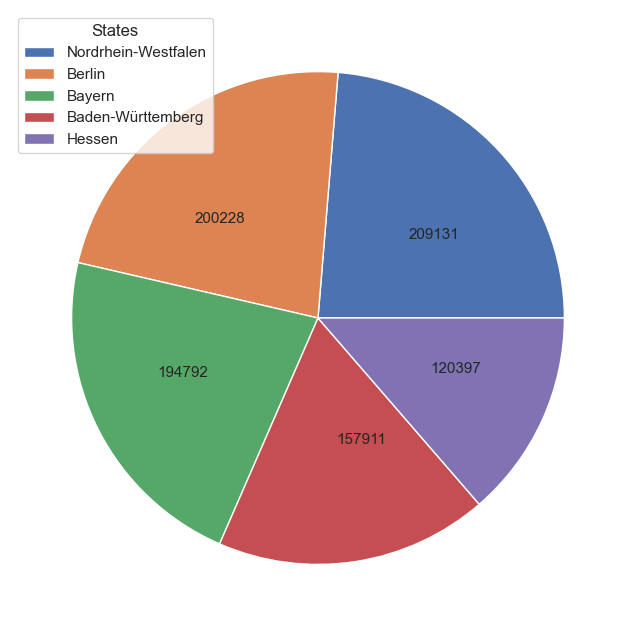

In [74]:
plt.figure(figsize=(8, 8))
data1 = df_state.sort_values(by="arrival_plan", ascending=False).head(5)
plt.pie(data=data1, x="arrival_plan", labels="arrival_plan", labeldistance=0.5) #only showing top 5
plt.legend(data1["state"], title="States")
plt.show

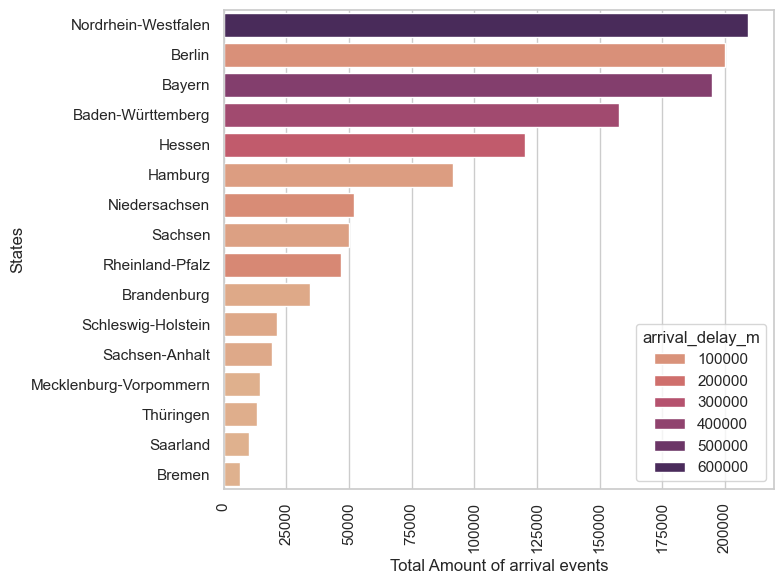

In [46]:
sns.set_theme(rc={'figure.figsize':(8,6)})
sns.set_theme(style="whitegrid")


ax = sns.barplot(data=df_state.sort_values(by="arrival_plan", ascending=False), x="arrival_plan", y="state", palette="flare", hue="arrival_delay_m", orient="h")

plt.xticks(rotation=90)
plt.xlabel("Total Amount of arrival events")
plt.ylabel("States")

plt.tight_layout()
plt.show()

# Contribution to total delay amount in Germany per state

<function matplotlib.pyplot.show(close=None, block=None)>

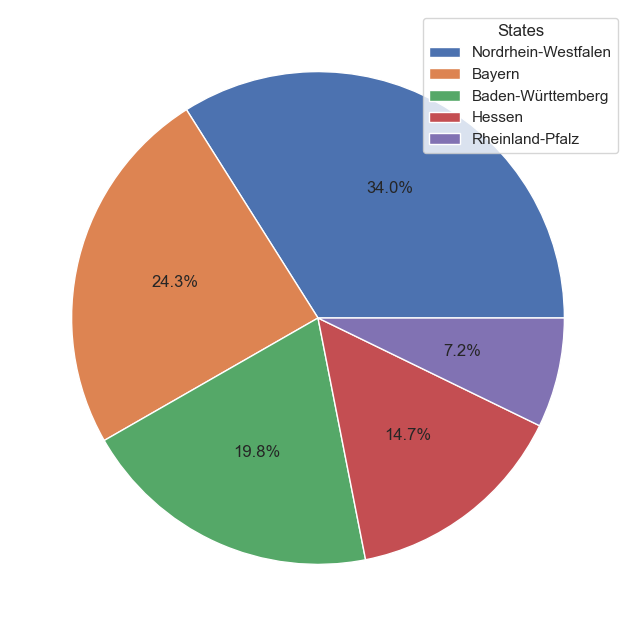

In [77]:
plt.figure(figsize=(8, 8))
data2 = df_state.sort_values(by="delay_amount_%", ascending=False).head(5)
plt.pie(data=data2, x="delay_amount_%", autopct="%1.1f%%") # only showing top 5
plt.legend(data2["state"], title="States")
plt.show

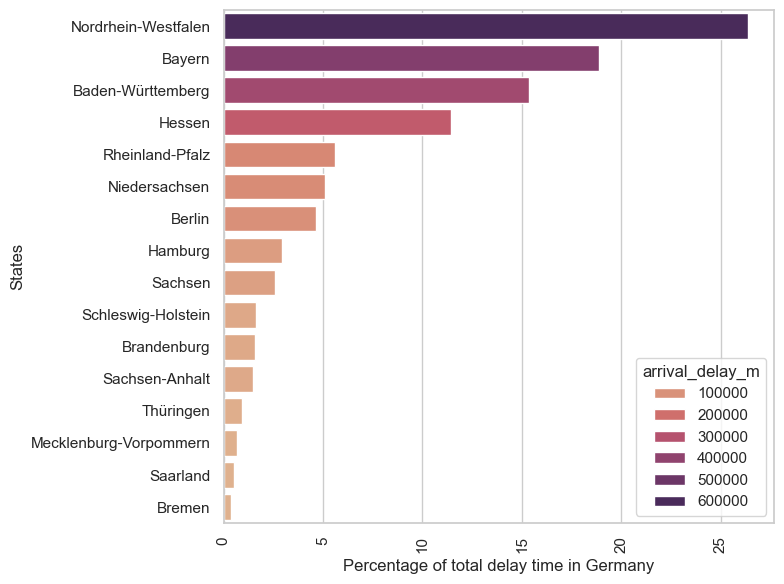

In [44]:
sns.set_theme(rc={'figure.figsize':(8,6)})
sns.set_theme(style="whitegrid")


ax = sns.barplot(data=df_state.sort_values(by="delay_amount_%", ascending=False), x="delay_amount_%", y="state", palette="flare", hue="arrival_delay_m", orient="h")

plt.xticks(rotation=90)
plt.xlabel("Percentage of total delay time in Germany")
plt.ylabel("States")

plt.tight_layout()
plt.show()

# Arrival delay per arrival for states

<function matplotlib.pyplot.show(close=None, block=None)>

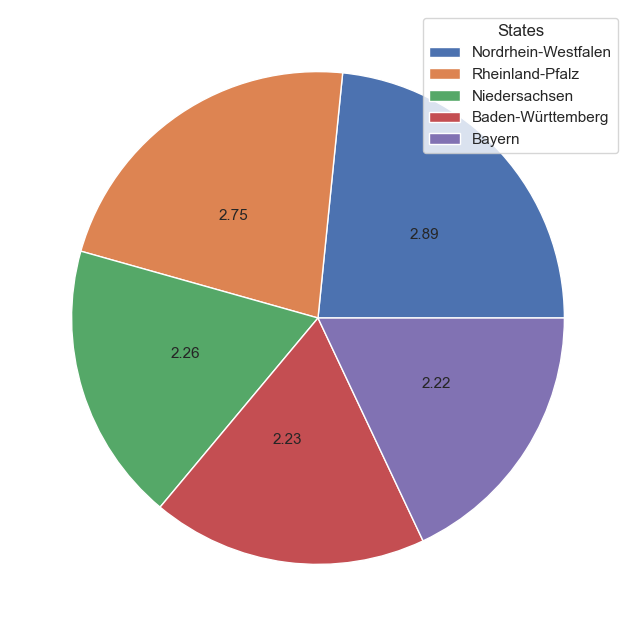

In [72]:
plt.figure(figsize=(8, 8))
data3 = df_state.sort_values(by="delay/arrival", ascending=False).head(5)
plt.pie(data=data3, x="delay/arrival", labels=data3["delay/arrival"].round(decimals=2), labeldistance=0.5) #ONLY SHOWING TOP5
plt.legend(data3["state"], title="States")
plt.show

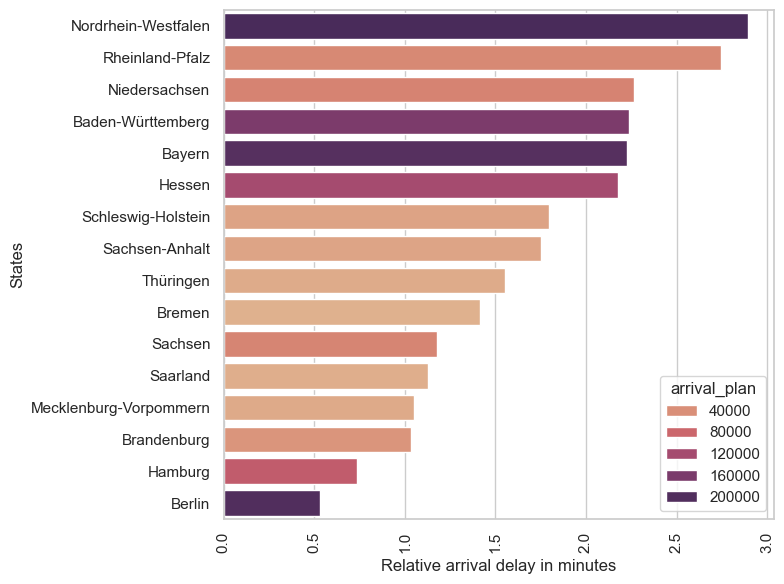

In [43]:
sns.set_theme(rc={'figure.figsize':(8,6)})
sns.set_theme(style="whitegrid")


ax = sns.barplot(data=df_state.sort_values(by="delay/arrival", ascending=False), y="state", x="delay/arrival", palette="flare", orient="h", hue="arrival_plan")

plt.xticks(rotation=90)
plt.xlabel("Relative arrival delay in minutes")
plt.ylabel("States")

plt.tight_layout()
plt.show()

# Side by Side comparison

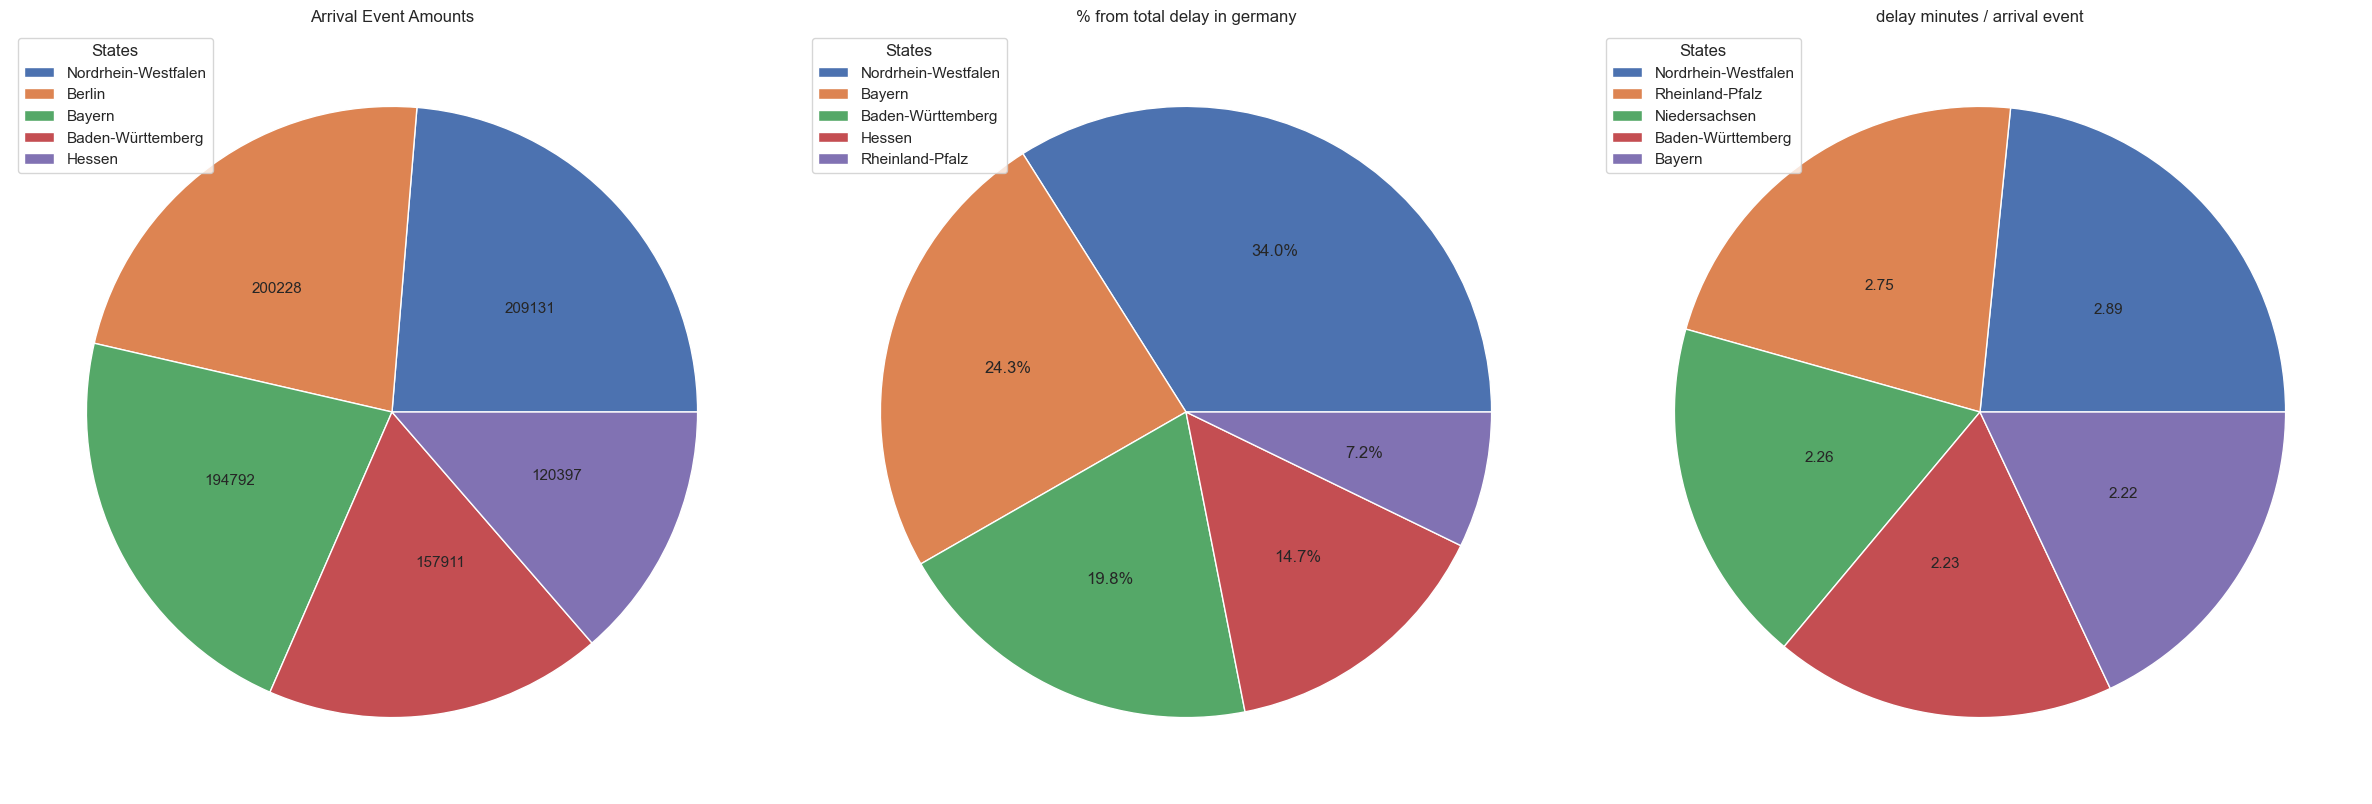

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns, with each plot having an 8x8 size

# First pie chart
axes[0].pie(data=data1, x="arrival_plan", labels="arrival_plan", labeldistance=0.5) #only showing top 5
axes[0].legend(data1["state"], title="States", loc='upper left')
axes[0].set_title("Arrival Event Amounts")

# Second pie chart
axes[1].pie(data=data2, x="delay_amount_%", autopct="%1.1f%%")
axes[1].legend(data2["state"], title="States", loc='upper left')
axes[1].set_title("% from total delay in germany")

# Third pie chart
axes[2].pie(data=data3, x="delay/arrival", labels=data3["delay/arrival"].round(decimals=2), labeldistance=0.5)
axes[2].legend(data3["state"], title="States", loc='upper left')
axes[2].set_title("delay minutes / arrival event")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

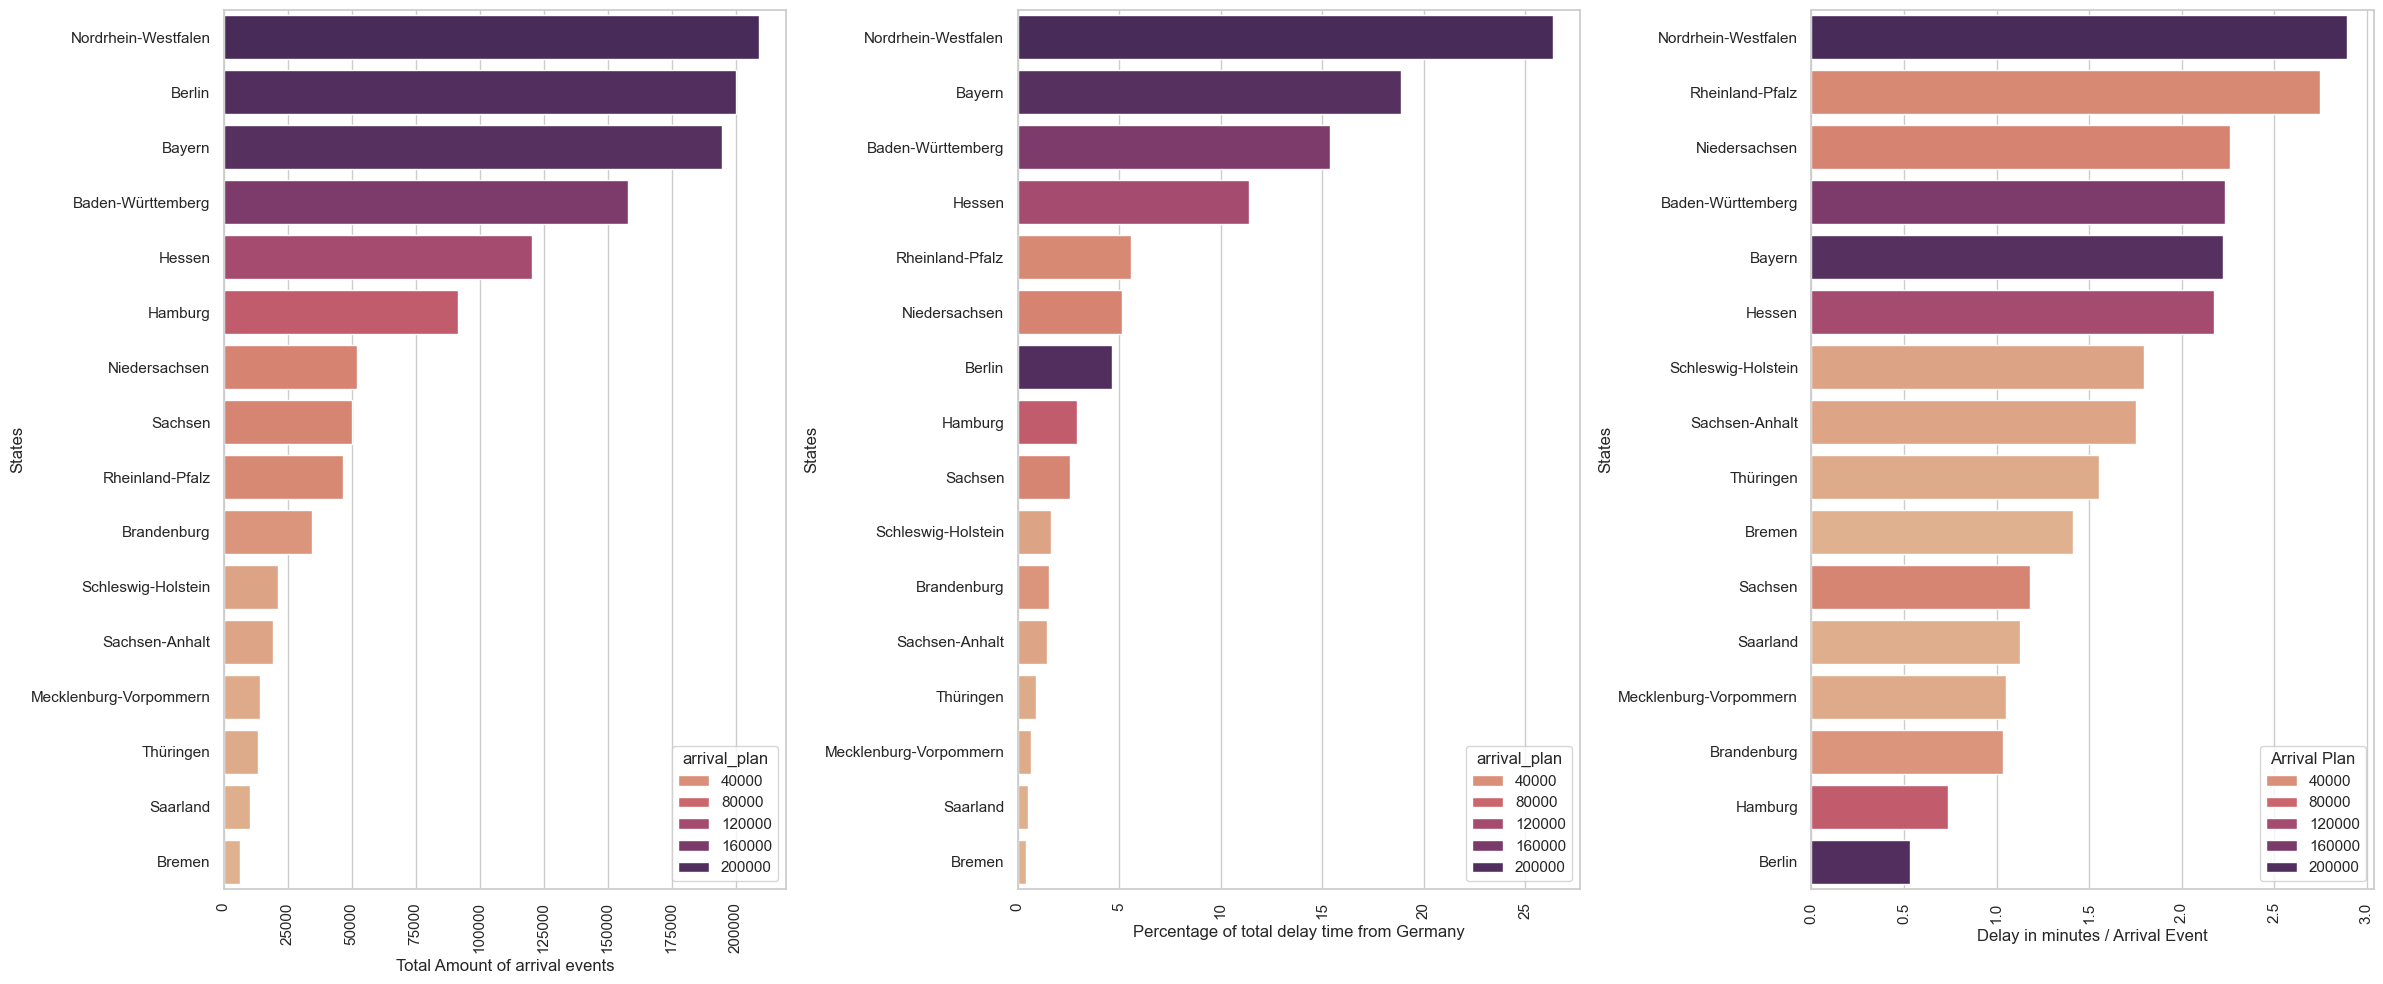

In [85]:
# Define the figure and the subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 10))  # 1 row, 3 columns, each plot with a size of 8x6 inches

# Set the theme for all plots
sns.set_theme(style="whitegrid")

# First bar plot
sns.barplot(data=df_state.sort_values(by="arrival_plan", ascending=False), x="arrival_plan", y="state", 
            palette="flare", hue="arrival_plan", orient="h", ax=axes[0])
axes[0].set_xlabel("Total Amount of arrival events")
axes[0].set_ylabel("States")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="arrival_plan")

# Second bar plot
sns.barplot(data=df_state.sort_values(by="delay_amount_%", ascending=False), x="delay_amount_%", y="state", 
            palette="flare", hue="arrival_plan", orient="h", ax=axes[1])
axes[1].set_xlabel("Percentage of total delay time from Germany")
axes[1].set_ylabel("States")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="arrival_plan")

# Third bar plot
sns.barplot(data=df_state.sort_values(by="delay/arrival", ascending=False), y="state", x="delay/arrival", 
            palette="flare", orient="h", hue="arrival_plan", ax=axes[2])
axes[2].set_xlabel("Delay in minutes / Arrival Event")
axes[2].set_ylabel("States")
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(title="Arrival Plan")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

NRW; BW, Bayern and Hessen have the highest ratio of delay time to arrival events and are therefore the prime suspects for in depth analysis.
<br>While Rheinland-Pfalz and Niedersachsen also have a high ratio, they are in the lower parts for total amounts of arrival events and therefore not as important to prioritize.

# Details for the most important States
## NRW, BW, Bayern, Hessen